In [ ]:
#import modules
!pip install nltk
from google.colab import files
import pandas as pd
import io
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize, word_tokenize, wordpunct_tokenize,RegexpTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics #accuracy calculation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
X = pd.read_csv("/content/drive/My Drive/Colab Notebooks/reddit_train.csv", encoding = 'latin1')

In [ ]:
#Kok's preprocessing
import re
corpus = []
for i in range(len(X)):
  comment = re.sub('[^a-zA-Z]',' ', X['BODY'][i])
  comment = comment.lower().split()
  ps = PorterStemmer()
  comment = [ps.stem(word) for word in comment if not word in set(stopwords.words('english'))]
  commment = ' '.join(comment)
  corpus.append(comment)


In [ ]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
y = X["REMOVED"]
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(X["BODY"])

SyntaxError: ignored

In [ ]:
#training data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

<14935x5000 sparse matrix of type '<class 'numpy.int64'>'
	with 503941 stored elements in Compressed Sparse Row format>

In [ ]:
#modelling
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
y_predict=model.predict(X_test)
y_predict_prob=model.predict_proba(X_test)


Accuracy: 0.6997344164974223
Confusion Matrix: [[3186 1230]
 [ 692 1293]]
AUC Score: 0.6864263908662798


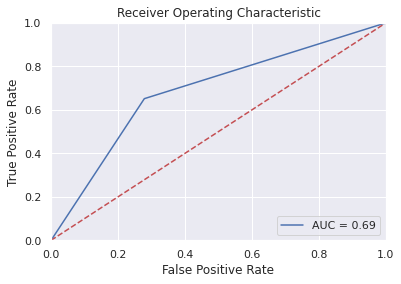

In [ ]:
#evaluation metrics
accuracy=model.score(X_test, y_test)
print("Accuracy: " + str(accuracy))
conf_matr=metrics.confusion_matrix(y_test, y_predict)
print("Confusion Matrix: " + str(conf_matr))
auc=metrics.roc_auc_score(y_test, y_predict)
print("AUC Score: " + str(auc))
fpr, tpr, threshold = metrics.roc_curve(y_test, y_predict)
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      4416
           1       0.51      0.65      0.57      1985

    accuracy                           0.70      6401
   macro avg       0.67      0.69      0.67      6401
weighted avg       0.73      0.70      0.71      6401



0.3941571629432901

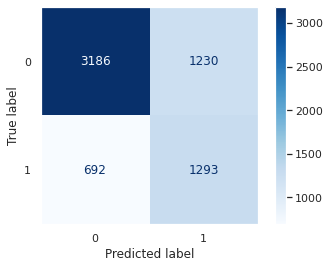

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_predict)) 
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, values_format = '.5g')
plt.grid(False)

(1293+1230)/(1293+1230+692+3186)



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf', MultinomialNB())])
tuned_parameters = {
    'vect__ngram_range': [(1, 1), (1, 2), (2, 2)],
    'tfidf__use_idf': (True, False),
    'tfidf__norm': ('l1', 'l2'),
    'clf__alpha': [1, 1e-1, 1e-2]
}
X_train, X_test, y_train, y_test = train_test_split(X["BODY"], X["REMOVED"], test_size=0.33, random_state=42)

model=MultinomialNB()
clf = GridSearchCV(text_clf, tuned_parameters, cv=10, verbose = 1, n_jobs = -1)
clf.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed: 10.4min finished


NameError: ignored

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, clf.predict(X_test), digits=4))
print(clf.best_params_)

              precision    recall  f1-score   support

           0     0.7392    0.9268    0.8224      4715
           1     0.6944    0.3371    0.4538      2326

    accuracy                         0.7320      7041
   macro avg     0.7168    0.6319    0.6381      7041
weighted avg     0.7244    0.7320    0.7007      7041

{'clf__alpha': 0.01, 'tfidf__norm': 'l2', 'tfidf__use_idf': False, 'vect__ngram_range': (1, 2)}
